In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
data=r'F:\Study\Machine Learning\House Sales\house_sales.csv'
sales_df=pd.read_csv(data)

In [ ]:
sales_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
del sales_df['id']

In [ ]:
sales_df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
sales_df['date']=sales_df['date'].str[:8]

In [ ]:
sales_df['date']=pd.to_datetime(sales_df['date'],dayfirst=True)

In [ ]:
sales_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
sales_df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
sales_df.shape

(21613, 20)

In [ ]:
sales_df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [ ]:
#There seems to be some fault in bathroom counts since no. of bathrooms can never be negative
sales_df['bathrooms']=sales_df['bathrooms'].round(decimals=0)
sales_df['bathrooms']=sales_df['bathrooms'].astype('int')

In [ ]:
sales_df['bathrooms'].value_counts()

2    13851
1     3933
3     2527
4     1201
5       57
6       24
0       14
8        4
7        2
Name: bathrooms, dtype: int64

In [ ]:
sales_df['floors']=sales_df['floors'].round(decimals=0)
sales_df['floors']=sales_df['floors'].astype('int')

In [ ]:
sales_df['floors'].value_counts()

1    10680
2    10312
3      613
4        8
Name: floors, dtype: int64

In [ ]:
sales_df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
#In yr_renovated data for most of the cases is not available where 0 is placed. Therefore, it's better to remove this column

In [ ]:
del sales_df['yr_renovated']

In [ ]:
sales_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503


C:\Users\HP PC\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


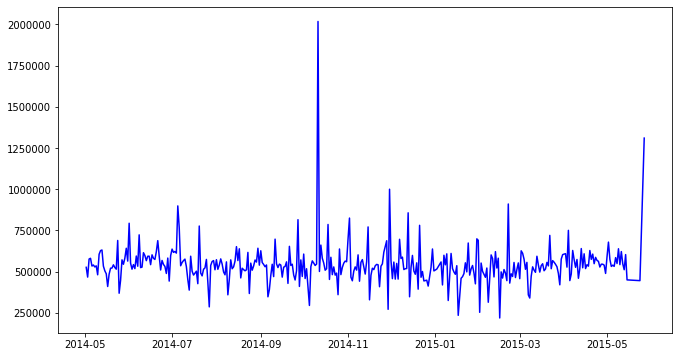

In [ ]:
plt.figure(figsize=(11,6))
group=sales_df[['date','price']].groupby(by='date').mean()
plt.plot(group.index,group['price'],color='blue')

In [ ]:
# The data shown in above figure [has stationarity and there is no trend shown in price with date of purchasing.
# Thus, we can neglect this column
del sales_df['date']

In [ ]:
# lat and long combine together represent a particular location, thus it's better to combine them

In [ ]:
from math import radians, cos, sin, asin, sqrt
def single_pt_haversine(lat, long):
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles
    # Convert decimal degrees to radians
    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(long/2)**2
    d = 2 * r * asin(sqrt(a)) 
    return d

In [ ]:
sales_df['haversine_distance']=[single_pt_haversine(lat,long) for lat,long in zip(sales_df.lat,sales_df.long)]

In [ ]:
sales_df[['haversine_distance']].head()

,haversine_distance
0,2965.959782
1,3992.739163
2,4272.669852
3,2652.374543
4,4281.317255


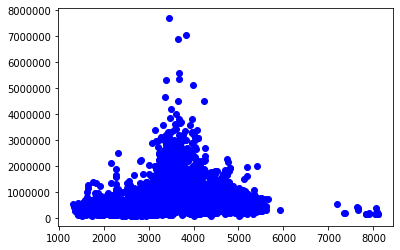

In [ ]:
plt.scatter(sales_df['haversine_distance'],sales_df['price'],color='blue')

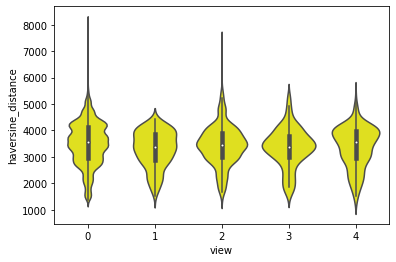

In [ ]:
#There seems to be the impact of location in terms of haversine_distance on sales
#But a particular location is characterized by various factors. Let's see effect of location on other locational factors.
sns.violinplot(x=sales_df['view'],y=sales_df['haversine_distance'],color='yellow')

In [ ]:
# There is a clear correlation between view, waterfront and location.
#Thus location column need to be removed in order to avoid the problem of homoscedasticity
del sales_df['haversine_distance']
del sales_df['lat']
del sales_df['long']
del sales_df['zipcode']
# Since zipcode also represent location

In [ ]:
sales_df.dtypes

price            float64
bedrooms           int64
bathrooms          int32
sqft_living        int64
sqft_lot           int64
floors             int32
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

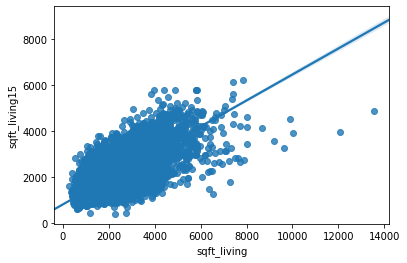

In [ ]:
sns.regplot(sales_df['sqft_living'],sales_df['sqft_living15'])

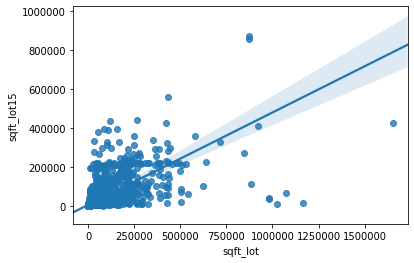

In [ ]:
sns.regplot(sales_df['sqft_lot'],sales_df['sqft_lot15'])

In [ ]:
sales_df[['sqft_living','sqft_living15']].corr()

,sqft_living,sqft_living15
sqft_living,1.00000,0.75642
sqft_living15,0.75642,1.00000


In [ ]:
sales_df[['sqft_living','price']].corr()

,sqft_living,price
sqft_living,1.000000,0.702035
price,0.702035,1.000000


In [ ]:
# There is stronger correlation between sqft_living and sqft_living15 as compared to correlation between sqrt_living and price.
# Similar is the case of sqrt_lot and sqft_lot15.
#Thus, it's better to drop one of them to avoid homoscedasticity
del sales_df['sqft_living15']
del sales_df['sqft_lot15']

### Bivariate Exploratory analysis

Text(0, 0.5, 'price')

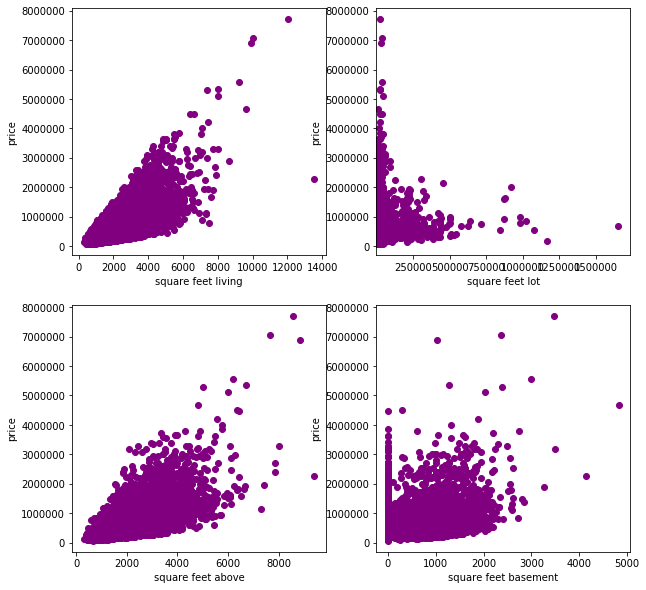

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(sales_df['sqft_living'],sales_df['price'],color='purple')
plt.xlabel('square feet living')
plt.ylabel('price')
plt.subplot(2,2,2)
plt.scatter(sales_df['sqft_lot'],sales_df['price'],color='purple')
plt.xlabel('square feet lot')
plt.ylabel('price')
plt.xlim(10,)
plt.subplot(2,2,3)
plt.scatter(sales_df['sqft_above'],sales_df['price'],color='purple')
plt.xlabel('square feet above')
plt.ylabel('price')
plt.subplot(2,2,4)
plt.scatter(sales_df['sqft_basement'],sales_df['price'],color='purple')
plt.xlabel('square feet basement')
plt.ylabel('price')

In [ ]:
sales_df.loc[sales_df['sqft_basement']==0,['sqft_basement']].count()

sqft_basement    13126
dtype: int64

In [ ]:
sales_df['sqft_living'].min()

290

(0, 5000000)

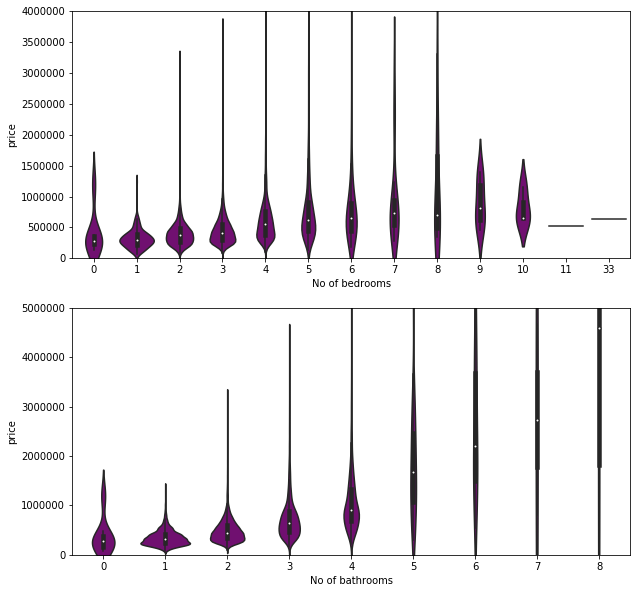

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.violinplot(sales_df['bedrooms'],sales_df['price'],color='purple')
plt.xlabel('No of bedrooms')
plt.ylabel('price')
plt.ylim(0,4000000)
plt.subplot(2,1,2)
sns.violinplot(sales_df['bathrooms'],sales_df['price'],color='purple')
plt.xlabel('No of bathrooms')
plt.ylabel('price')
plt.ylim(0,5000000)

(0, 3000000)

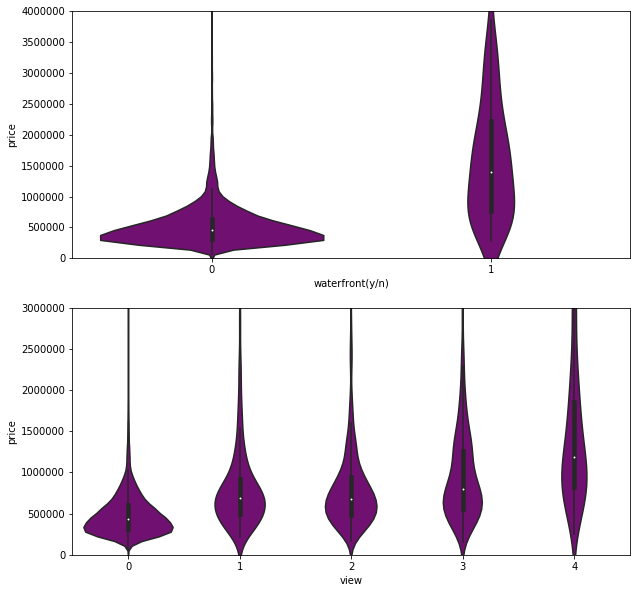

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.violinplot(sales_df['waterfront'],sales_df['price'],color='purple')
plt.xlabel('waterfront(y/n)')
plt.ylabel('price')
plt.ylim(0,4000000)
plt.subplot(2,1,2)
sns.violinplot(sales_df['view'],sales_df['price'],color='purple')
plt.xlabel('view')
plt.ylabel('price')
plt.ylim(0,3000000)

(0, 1000000)

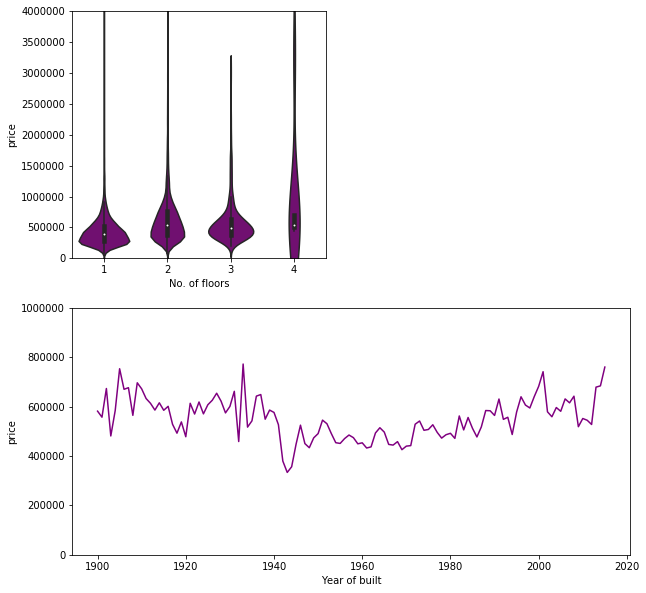

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(sales_df['floors'],sales_df['price'],color='purple')
plt.xlabel('No. of floors')
plt.ylabel('price')
plt.ylim(0,4000000)
plt.subplot(2,1,2)
group=sales_df[['price','yr_built']].groupby(by='yr_built').mean()
plt.plot(group.index,group['price'],color='purple')
plt.xlabel('Year of built')
plt.ylabel('price')
plt.ylim(0,1000000)

In [ ]:
# There is no clear effect of year of built on sales. Thus, we may drop it
del sales_df['yr_built']

(0, 3000000)

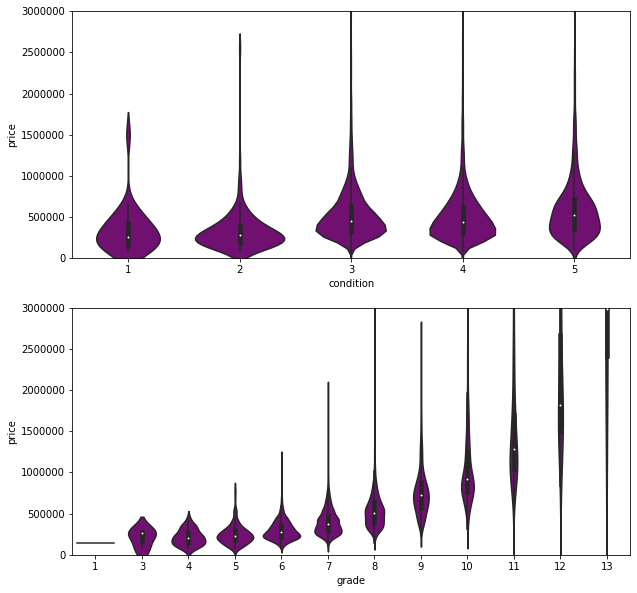

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.violinplot(sales_df['condition'],sales_df['price'],color='purple')
plt.xlabel('condition')
plt.ylabel('price')
plt.ylim(0,3000000)
plt.subplot(2,1,2)
sns.violinplot(sales_df['grade'],sales_df['price'],color='purple')
plt.xlabel('grade')
plt.ylabel('price')
plt.ylim(0,3000000)

In [ ]:
#In bedrooms column, the houses with no. of beds 11 and above are outliers. Thus, it's better to drop the outlier rows

labels=sales_df.loc[sales_df['bedrooms'].isin([11,33])].index
sales_df.drop(labels=labels,axis=0,inplace=True)

In [ ]:
sales_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
Name: bedrooms, dtype: int64

In [ ]:
sales_df.corr().style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
price,1,0.315983,0.518936,0.702066,0.0896634,0.24493,0.266371,0.397299,0.0363348,0.667451,0.605601,0.323817
bedrooms,0.315983,1,0.501999,0.59206,0.0329562,0.183543,-0.00658795,0.0821831,0.0257649,0.367323,0.491122,0.309729
bathrooms,0.518936,0.501999,1,0.70177,0.0900047,0.326438,0.0654353,0.202672,-0.0666521,0.591329,0.599355,0.33489
sqft_living,0.702066,0.59206,0.70177,1,0.172837,0.321947,0.103823,0.284628,-0.0586771,0.762751,0.876594,0.435048
sqft_lot,0.0896634,0.0329562,0.0900047,0.172837,1,-0.00194741,0.0216019,0.074704,-0.00894185,0.113611,0.183518,0.0153011
floors,0.24493,0.183543,0.326438,0.321947,-0.00194741,1,0.0258399,0.0279706,-0.223167,0.407693,0.488376,-0.245672
waterfront,0.266371,-0.00658795,0.0654353,0.103823,0.0216019,0.0258399,1,0.401857,0.0166629,0.0827716,0.0720762,0.0805951
view,0.397299,0.0821831,0.202672,0.284628,0.074704,0.0279706,0.401857,1,0.0460224,0.251309,0.167653,0.276973
condition,0.0363348,0.0257649,-0.0666521,-0.0586771,-0.00894185,-0.223167,0.0166629,0.0460224,1,-0.14465,-0.158118,0.174081
grade,0.667451,0.367323,0.591329,0.762751,0.113611,0.407693,0.0827716,0.251309,-0.14465,1,0.755953,0.168433


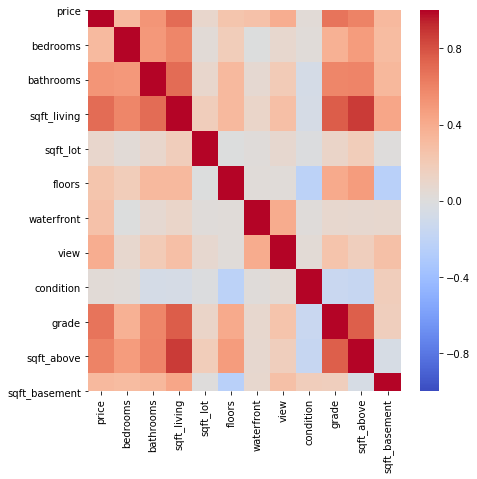

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(sales_df.corr(),cmap='coolwarm',vmin=-1,vmax=1)

## Model building

In [ ]:
X=sales_df.iloc[:,1:].values
y=sales_df.iloc[:,0].values
print(X.shape)
print(y.shape)

(21611, 11)
(21611,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=0)

### Multiple Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(normalize=True)

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred=regressor.predict(X_test)
print('RMSE:',sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 236255.94447212113


**RMSE value obtained by Linear Regression model is 236255.944**

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0,max_features=9)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=9,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [ ]:
y_pred=regressor.predict(X_test)
print('RMSE:',sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 269139.4247624496


**RMSE value obtained in Decision Tree Regression is 269139.424**

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=150,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [ ]:
y_pred=regressor.predict(X_test)
print('RMSE:',sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 206399.65131297178


**RMSE value obtained by Random Forest Regression model is 206399.65**

### Gradient Boost Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regressor= GradientBoostingRegressor(alpha=.9,learning_rate=.1,n_estimators=200,random_state=0)
regressor.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [ ]:
y_pred=regressor.predict(X_test)
print('RMSE:',sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 204882.66013597167


**RMSE value obtained in Gradient Boosting Regression model is 204882.66**

**From all the above models, the best model is GradientBoostingRegression**